In [1]:
import librosa
import os
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np

# Load in Data

## About DSD100

The dsd100 is a dataset of 100 full lengths music tracks of different styles along with their isolated drums, bass, vocals and others stems. dsd100 contains two folders, a folder with a training set: "train", composed of 50 songs, and a folder with a test set: "test", composed of 50 songs. Supervised approaches should be trained on the training set and tested on both sets.For each file, the mixture correspond to the sum of all the signals. All signals are stereophonic and encoded at 44.1kHz. [Source](https://sigsep.github.io/datasets/dsd100.html)


For this simple example, I will load in one song for visualization.

In [2]:
# Get path to files
dsd_path = os.path.abspath('DSD100')
mix_path = os.path.join(dsd_path, 'Mixtures/Dev/051 - AM Contra - Heart Peripheral/mixture.wav')
vocal_path = os.path.join(dsd_path, 'Sources/Dev/051 - AM Contra - Heart Peripheral/vocals.wav')

# Load in audio
mix, sr = librosa.load(mix_path, sr=8192)
vocals, sr = librosa.load(vocal_path, sr=8192)

print(f'Shape of song array: {mix.shape} \n Samplerate: {sr}')

Shape of song array: (1721187,) 
 Samplerate: 8192


To load in the audio, `librosa.load` only needs the path to the song and the samplerate. From the dataset above, we know that the audio is recorded at 44.1 $\text{kHz}$. However, for training and testing, we will downsample the audio to 8192 $\text{Hz}$.

Now, we will visualize the waveforms and spectrograms.

# Visualizations

## Wave Forms

This is what we typically visualize when we try to see audio.

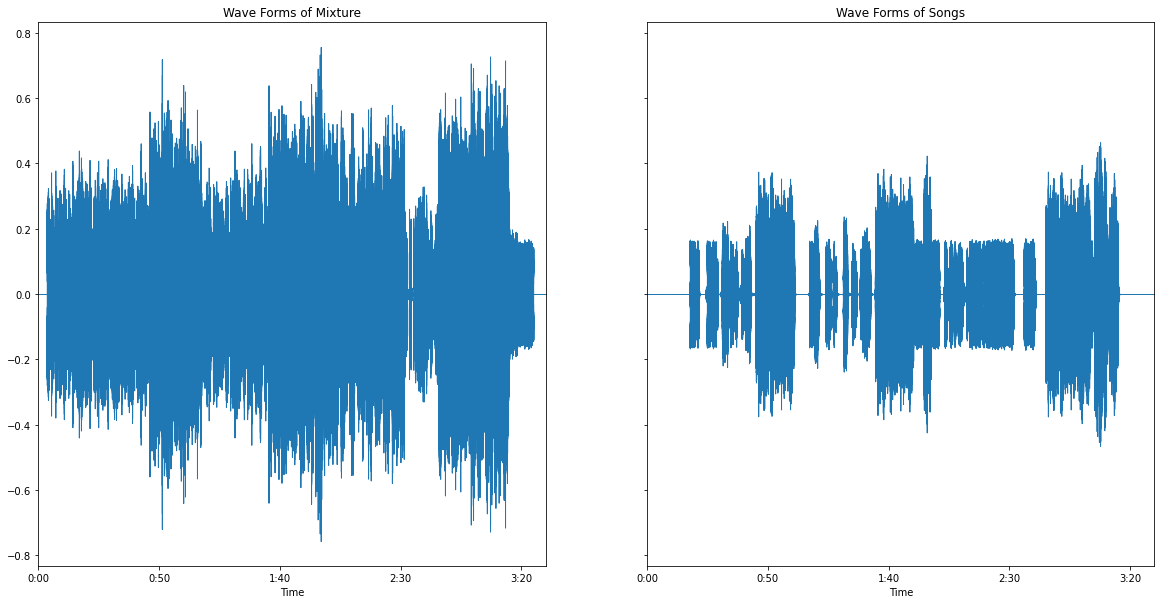

In [3]:
# Initialize figure and axes for plotting
# They will be visualized side by side
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10), sharey=True) 

# Wave plot of mixed song
ld.waveplot(mix, sr=sr, x_axis='time', ax=ax[0])
ax[0].set(title = 'Wave Forms of Mixture')

# Wave plot of vocals
ld.waveplot(vocals, sr=sr, x_axis='time', ax=ax[1])
ax[1].set(title = 'Wave Forms of Songs')

# Show figure
plt.show()

## Fourier Spectrograms

Now, let's visualize Fourier based spectrograms. To do this, we need to designate a specific hop length (i.e. number of points we will slide over) and the number of Fourier transformations we will take. The `hop_length` and `n_fft` are generally hyperparameters that have no set "perfect number." However, the numbers selected before have had good results for me.

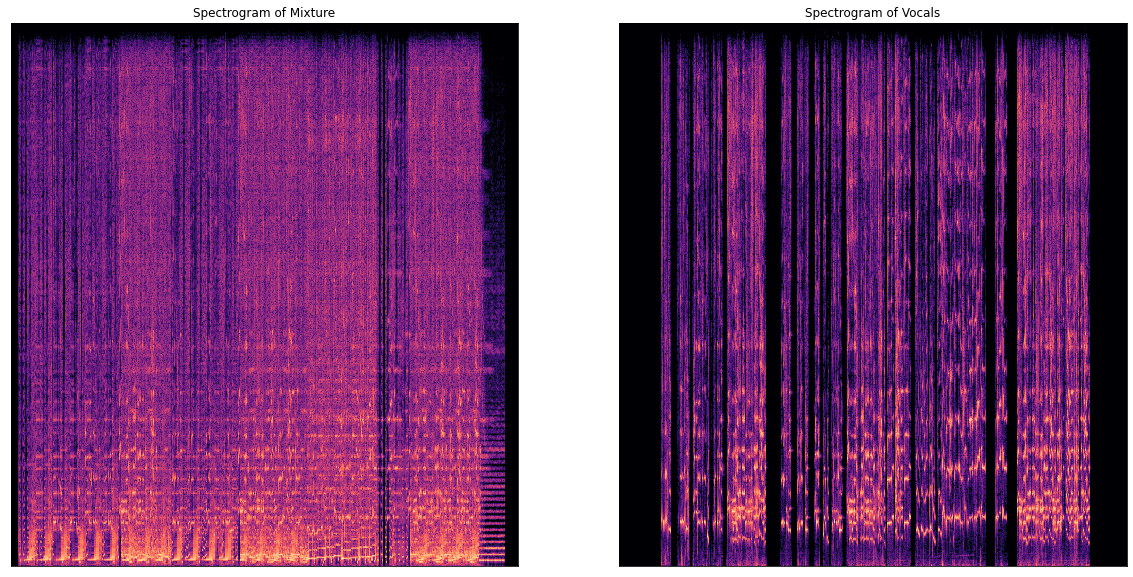

In [18]:
hop_length = 512
n_fft = 2048

# Take absolute value when taking Fourier transformations
mix_fft = np.abs(librosa.core.stft(mix, n_fft = n_fft, hop_length = hop_length))
vocals_fft = np.abs(librosa.core.stft(vocals, n_fft = n_fft, hop_length = hop_length))

# Change from amplitude to dB for better visualization
mixdB = librosa.amplitude_to_db(mix_fft)
vocalsdB = librosa.amplitude_to_db(vocals_fft)

# Visualize Fourier spectrograms
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10), sharey=True) 
# Mixture
ax[0].set(title = 'Spectrogram of Mixture')
ld.specshow(mixdB, sr = sr, ax=ax[0], hop_length=hop_length, cmap = 'magma')
# Vocals
ax[1].set(title = 'Spectrogram of Vocals')
ld.specshow(vocalsdB, sr = sr, ax=ax[1], hop_length=hop_length, cmap = 'magma')
plt.show()

## Mel Spectrograms

As mentioned before, converting to the Mel Scale allows for human like representative hearing. Simply put, the relationship is logarithmic. The equation from converting from Hz to Mel is the following:

$$ m = 1127 \log \left( 1 + \frac{f}{700} \right) $$

Where $\log$ represents the natural logarithm. Let's now visualize Mel Spectrograms.

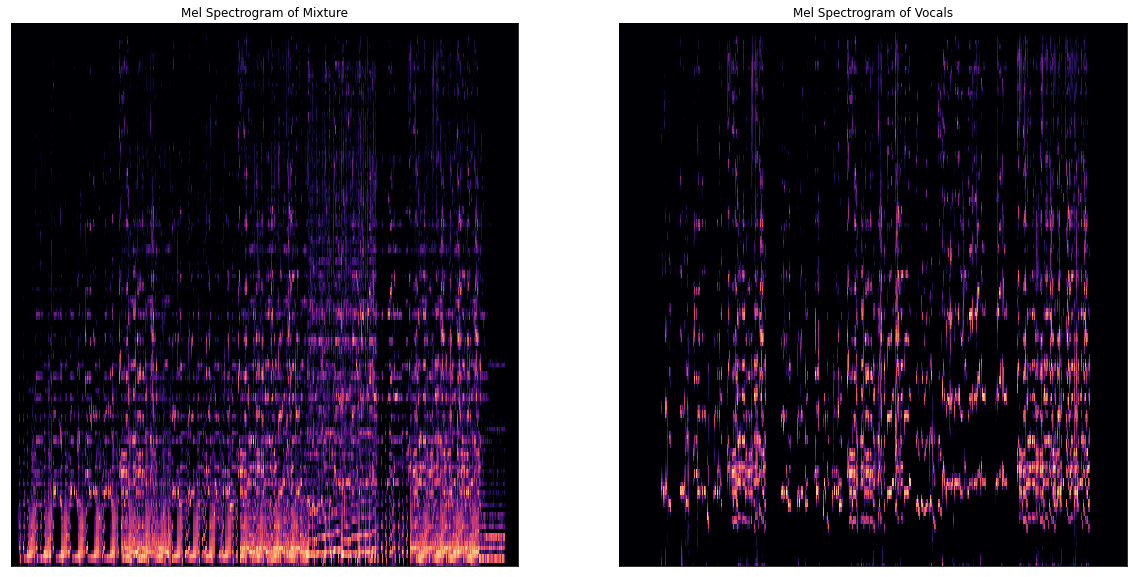

In [4]:
hop_length = 512
n_fft = 2048

# Create melspectrograms
mix_mel = librosa.feature.melspectrogram(mix, sr=sr, n_fft=n_fft, hop_length=hop_length)
vocal_mel = librosa.feature.melspectrogram(vocals, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Again, convert to dB for better visualizations
mix_mel_dB = librosa.amplitude_to_db(mix_mel)
vocal_mel_dB = librosa.amplitude_to_db(vocal_mel)

# Visualize Mel Spectrograms
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10), sharey=True) 
# Mixture
ax[0].set(title = 'Mel Spectrogram of Mixture')
ld.specshow(mix_mel_dB, sr = sr, ax=ax[0], hop_length=hop_length, cmap = 'magma')
# Vocals
ax[1].set(title = 'Mel Spectrogram of Vocals')
ld.specshow(vocal_mel_dB, sr = sr, ax=ax[1], hop_length=hop_length, cmap = 'magma')
plt.show()